# Importing Libaries

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Read and Explore Data

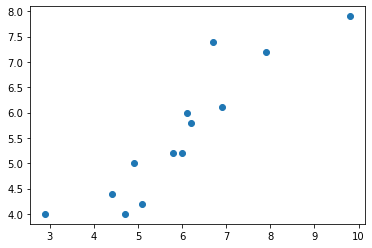

In [11]:
Data_points = np.genfromtxt("RegData.csv" ,  delimiter= ',')
X_Data = Data_points[:,0]
Y_Data = Data_points[:,1]

plt.scatter(X_Data , Y_Data)
plt.show()

In [12]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , 1))  , axis = 1)

# Batch Momentum based

In [14]:
theta = np.array([0 , 0 ])
alpha = 0.001
Data_length = len(X_Data)
Epoch = 100

Not_first_iter = 0
Jtheta = []
theta = np.zeros(2)
theta_zero = []
theta_one = []
Max_no_iter = 10000
Gamma = 0.9
Vt = 0

    
for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
    if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 5e-9:
            break
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Data_length))
    
    Vt = Gamma*Vt + alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
    theta = theta - Vt
    Not_first_iter+=1
    
print(theta)      

[0.79507547 0.79507547]


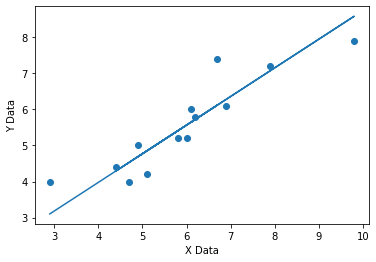

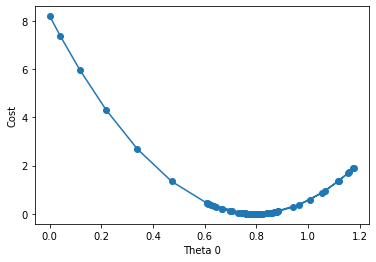

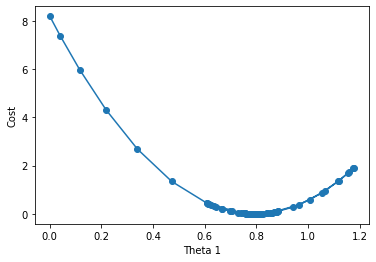

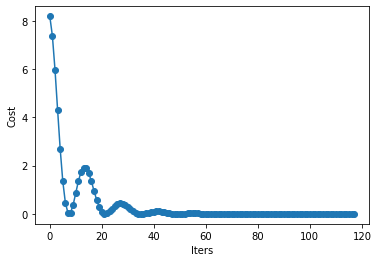

In [15]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# NAG Algorithm (Batch Momentum based Improving)

In [16]:
theta = np.array([0 , 0 ])
alpha = 0.001
Data_length = len(X_Data)
Epoch = 100

Not_first_iter = 0
Jtheta = []
theta = np.zeros(2)
theta_zero = []
theta_one = []
Max_no_iter = 10000

Gamma = 0.09
Vt = 0
Theta_Tmp = 0
for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
#     if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 5e-9:
#             break
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Data_length))
    
    Theta_Tmp = theta - Gamma*Vt
    theta = theta - alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
    Vt = Gamma*Vt + alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
    
print(theta)   



[0.79523135 0.79523135]


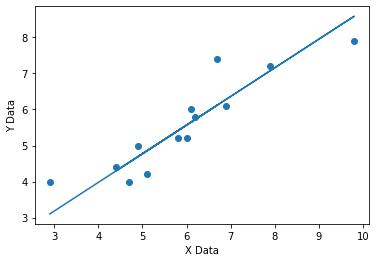

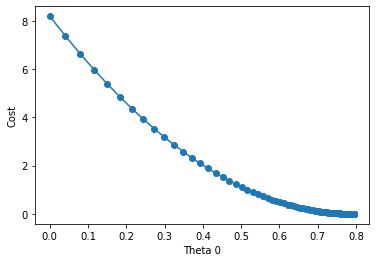

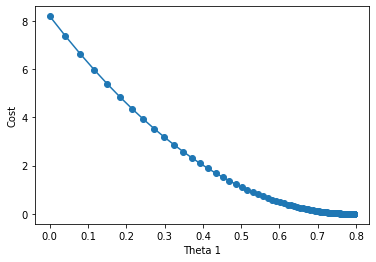

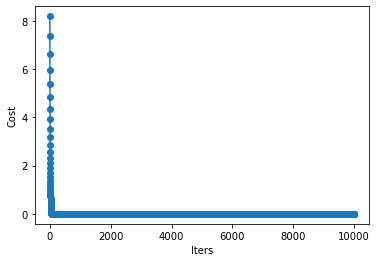

In [17]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()